---
title: Introduction to fastai (draft)
---

## What is fastai?

As mentioned in the previous chapter, we will now look at a extremely popular deep learning framework called [`fastai`](https://docs.fast.ai/). `fastai` is an open-source software library for machine learning, which provides high-level APIs for deep learning applications. It is built on top of PyTorch and is designed to be easy to use and flexible, allowing developers to quickly prototype and implement their ideas. `fastai` provides a wide range of pre-trained models, including state-of-the-art models for computer vision, natural language processing, and recommendation systems. Additionally, `fastai` offers a number of useful tools and utilities for data processing and model evaluation, making it a popular choice among researchers and practitioners alike.

The creators of `fastai` have also created accompanying educational resources to assist in learning deep learning through the use of their framework. Both the course and book are highly recommended.

- Here is the link to the free course: [Link](https://course.fast.ai/)
- Here is the link to the book: [Link](https://github.com/fastai/fastbook)

The creators also have a peer-review paper published explaining high-level functionality and layered approach to the fastai library- [Link](https://arxiv.org/abs/2002.04688).

<figure align = "center">
    <img src="./img/fastai_api.png" style="width:80%">
    <figcaption align = "center">
        Fig 9.1: The layered API from fastai.
    </figcaption>
</figure>

## Introduction to fastai API

## MNIST example using High level API

## MNIST example using Mid level API

## MNIST example using Low level API

## Creating a dataloader

In [13]:
from fastai.vision.all import *

In [14]:
dPath = Path("../data/mnist_png/")

In [15]:
dPath.ls()

(#3) [Path('../data/mnist_png/models'),Path('../data/mnist_png/testing'),Path('../data/mnist_png/training')]

In [16]:
get_image_files(dPath)

(#70000) [Path('../data/mnist_png/testing/0/10.png'),Path('../data/mnist_png/testing/0/1001.png'),Path('../data/mnist_png/testing/0/1009.png'),Path('../data/mnist_png/testing/0/101.png'),Path('../data/mnist_png/testing/0/1034.png'),Path('../data/mnist_png/testing/0/1047.png'),Path('../data/mnist_png/testing/0/1061.png'),Path('../data/mnist_png/testing/0/1084.png'),Path('../data/mnist_png/testing/0/1094.png'),Path('../data/mnist_png/testing/0/1121.png')...]

In [17]:
dataset = DataBlock(
                blocks = (ImageBlock(cls = PILImageBW), CategoryBlock),
                get_items = get_image_files,
                splitter = GrandparentSplitter(train_name='training', valid_name='testing'),
                get_y = parent_label,
                item_tfms = Resize(28),
                batch_tfms = None
            )

dls = dataset.dataloaders(dPath, bs=128)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
10


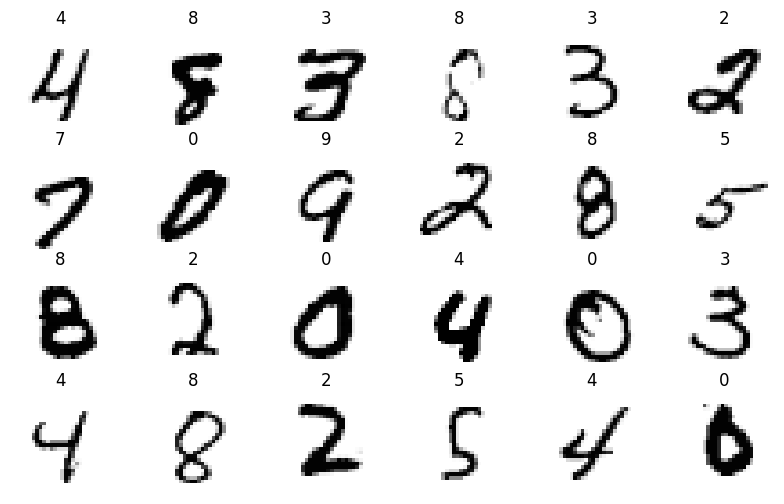

In [18]:
print(dls.vocab) ## Prints class labels
print(dls.c) ## Prints number of classes
dls.show_batch(max_n=24,figsize=(10,6)) ## Show sample data

In [19]:
dls.one_batch()[0].shape, dls.one_batch()[1].shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [20]:
class MLP(nn.Module):
    def __init__(self, n_in, n_out):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(n_in, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, n_out)
        )
    def forward(self, x):
        return self.model(x.view(-1,784))

In [21]:
## Defining the learner
model = MLP(784, 10)
mlp_learner = Learner(
    dls = dls, 
    model=model, 
    loss_func=F.cross_entropy, 
    model_dir=dPath/"models",
    metrics=accuracy)

SuggestedLRs(valley=0.0005754399462603033)

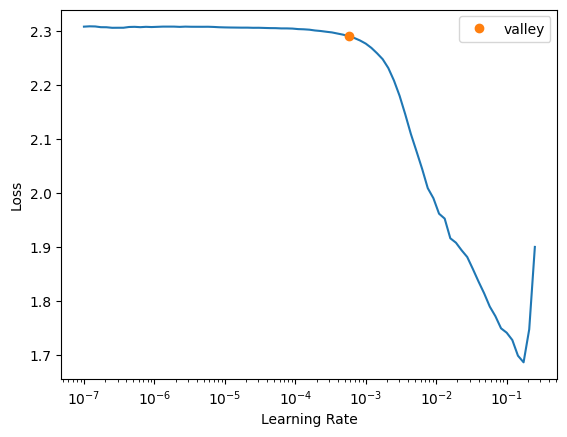

In [22]:
## Finidng Ideal learning late
mlp_learner.lr_find()

In [23]:
mlp_learner.fit_one_cycle(5,5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.415048,0.640518,0.835600,00:37
1,0.299409,0.296634,0.935100,00:37
2,0.198500,0.212431,0.950100,00:38
3,0.119415,0.128112,0.967800,00:38
4,0.065490,0.106387,0.973300,00:38
